**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt number of adjustment year](#toc3_1_)    
    - 3.1.1. [Effect on government](#toc3_1_1_)    
    - 3.1.2. [Effect on households](#toc3_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Government spending shock - further comments

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')

**Unpack namespaces:**

In [3]:
par = model.par
ss = model.ss
sol = model.sol
par.t_b = 1         # the government chooses to fix its tax rate for 1 year

**Define sensitivity parameter and values:**

In [4]:
parameter = 'beta'                                               # set parameter 
parvalues = [0.93,0.95,0.97]                                          # set parameter values
models = model.multi_model(parameter,parvalues)                    # create one model for each value

Jacobian calculated in 1.0 mins 5 secs
Jacobian calculated in 31.2 secs
Jacobian calculated in 28.0 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

**Define shock:**

In [5]:
Tshock = 50                                                    # length of shock
persistence = 0.5**np.arange(Tshock)                           # persistence of shock

In [6]:
for model_ in models:

    model_.set_exo_ss()                                         
    model_.set_unknowns_ss()                                             
    model_.sol.G[:Tshock] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                                           

initial:
t1-t0 = 0.01396 secs
it = 3
    max. abs. error = 7.84e-11
    7.40e-13 in A_R_ini_error
    2.52e-13 in Aq_diff
    6.98e-13 in FOC_capital_agency
    2.13e-12 in FOC_K_ell
    7.84e-11 in mkt_clearing
    2.00e-12 in PC

solve: t1-t0 = 0.40156 secs
evaluate + update: t3-t2 = 0.05698 secs
initial:
t1-t0 = 0.01197 secs
it = 3
    max. abs. error = 8.05e-11
    7.51e-13 in A_R_ini_error
    2.60e-13 in Aq_diff
    7.34e-13 in FOC_capital_agency
    2.36e-12 in FOC_K_ell
    8.05e-11 in mkt_clearing
    2.14e-12 in PC

solve: t1-t0 = 0.17543 secs
evaluate + update: t3-t2 = 0.05368 secs
initial:
t1-t0 = 0.01296 secs
it = 3
    max. abs. error = 8.41e-11
    7.84e-13 in A_R_ini_error
    2.67e-13 in Aq_diff
    7.65e-13 in FOC_capital_agency
    2.53e-12 in FOC_K_ell
    8.41e-11 in mkt_clearing
    2.19e-12 in PC

solve: t1-t0 = 0.15051 secs
evaluate + update: t3-t2 = 0.05810 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt number of adjustment year](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on government](#toc0_)

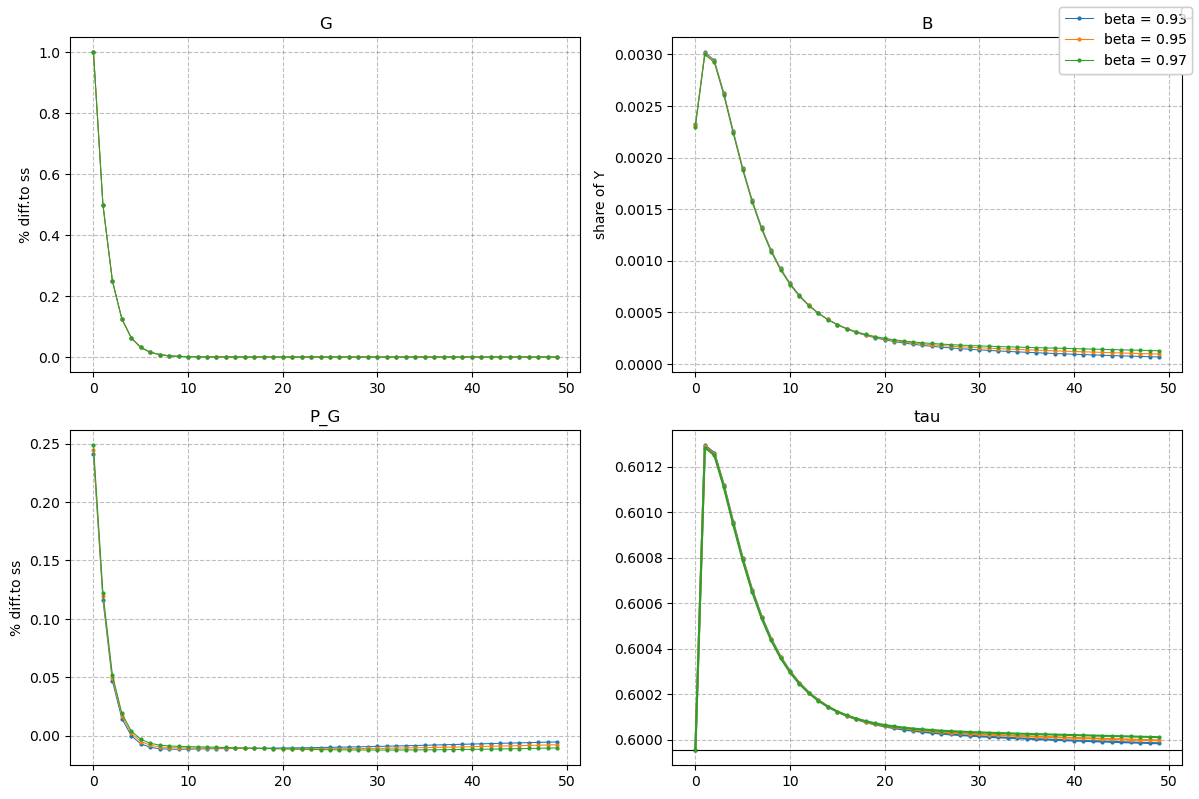

In [7]:
model.plot_IRF_models(models,parameter,varlist=['G','B','P_G','tau'],abs=['tau'],Y_share=['B'],ncol=2)

#### 4.2.2. <a id='toc4_2_2_'></a>[Effect on Phillips-curve](#toc0_)

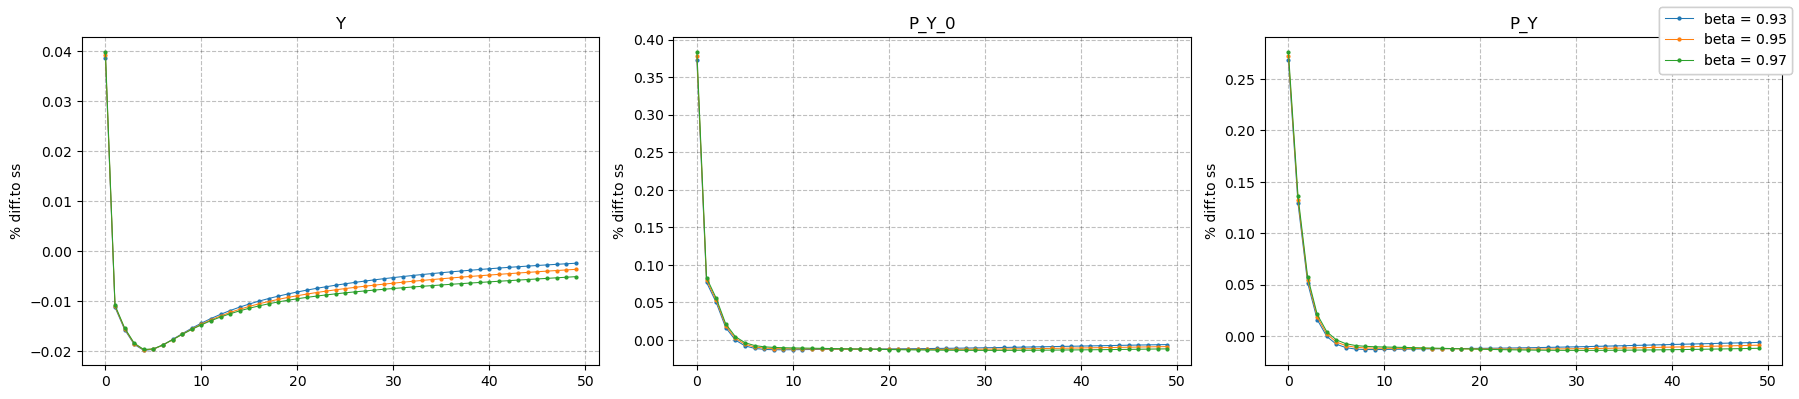

In [8]:
model.plot_IRF_models(models,parameter,varlist=['Y','P_Y_0','P_Y'])

#### 3.1.2. <a id='toc3_1_2_'></a>[Effect on households](#toc0_)

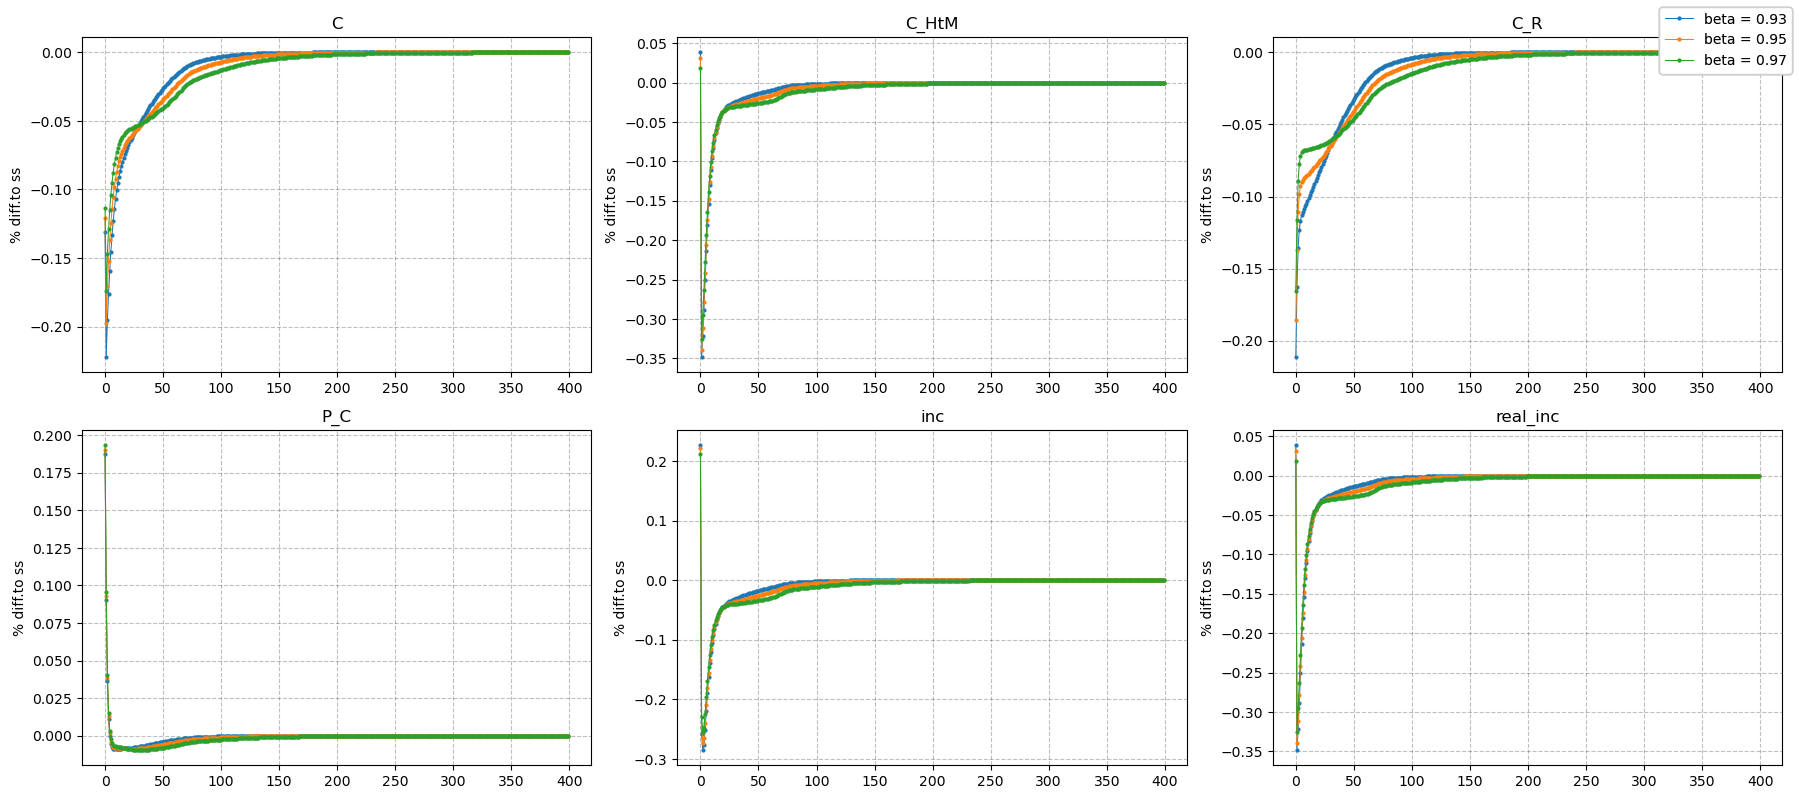

In [9]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc'], T_IRF=par.T)

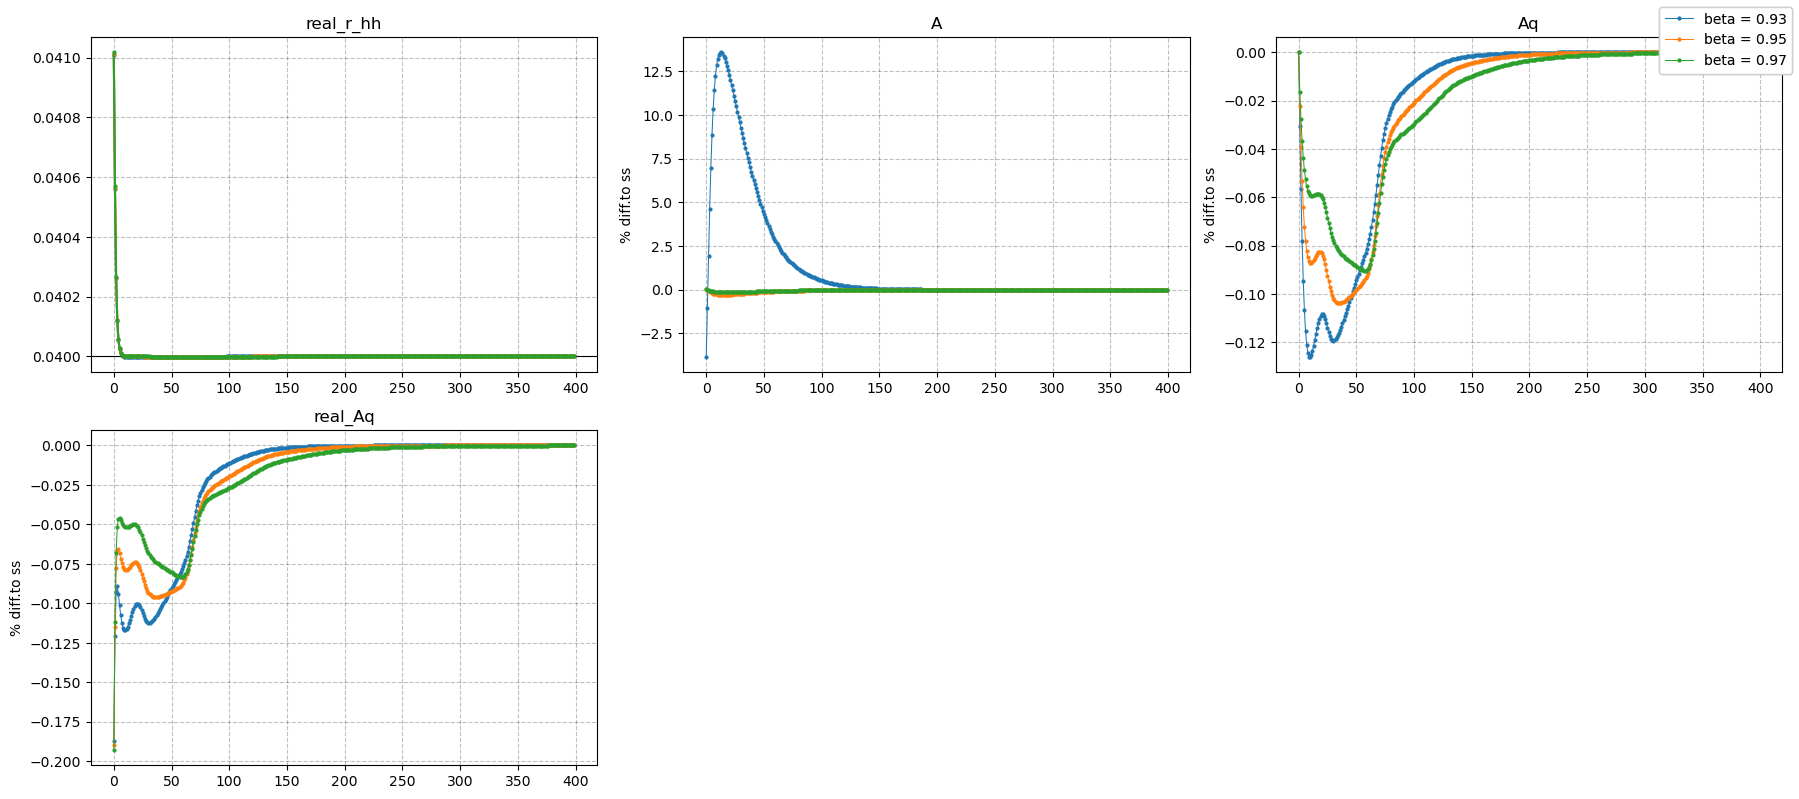

In [10]:
model.plot_IRF_models(models,parameter,varlist=['real_r_hh','A','Aq','real_Aq'],ncol=3,abs=['real_r_hh'], T_IRF=par.T)

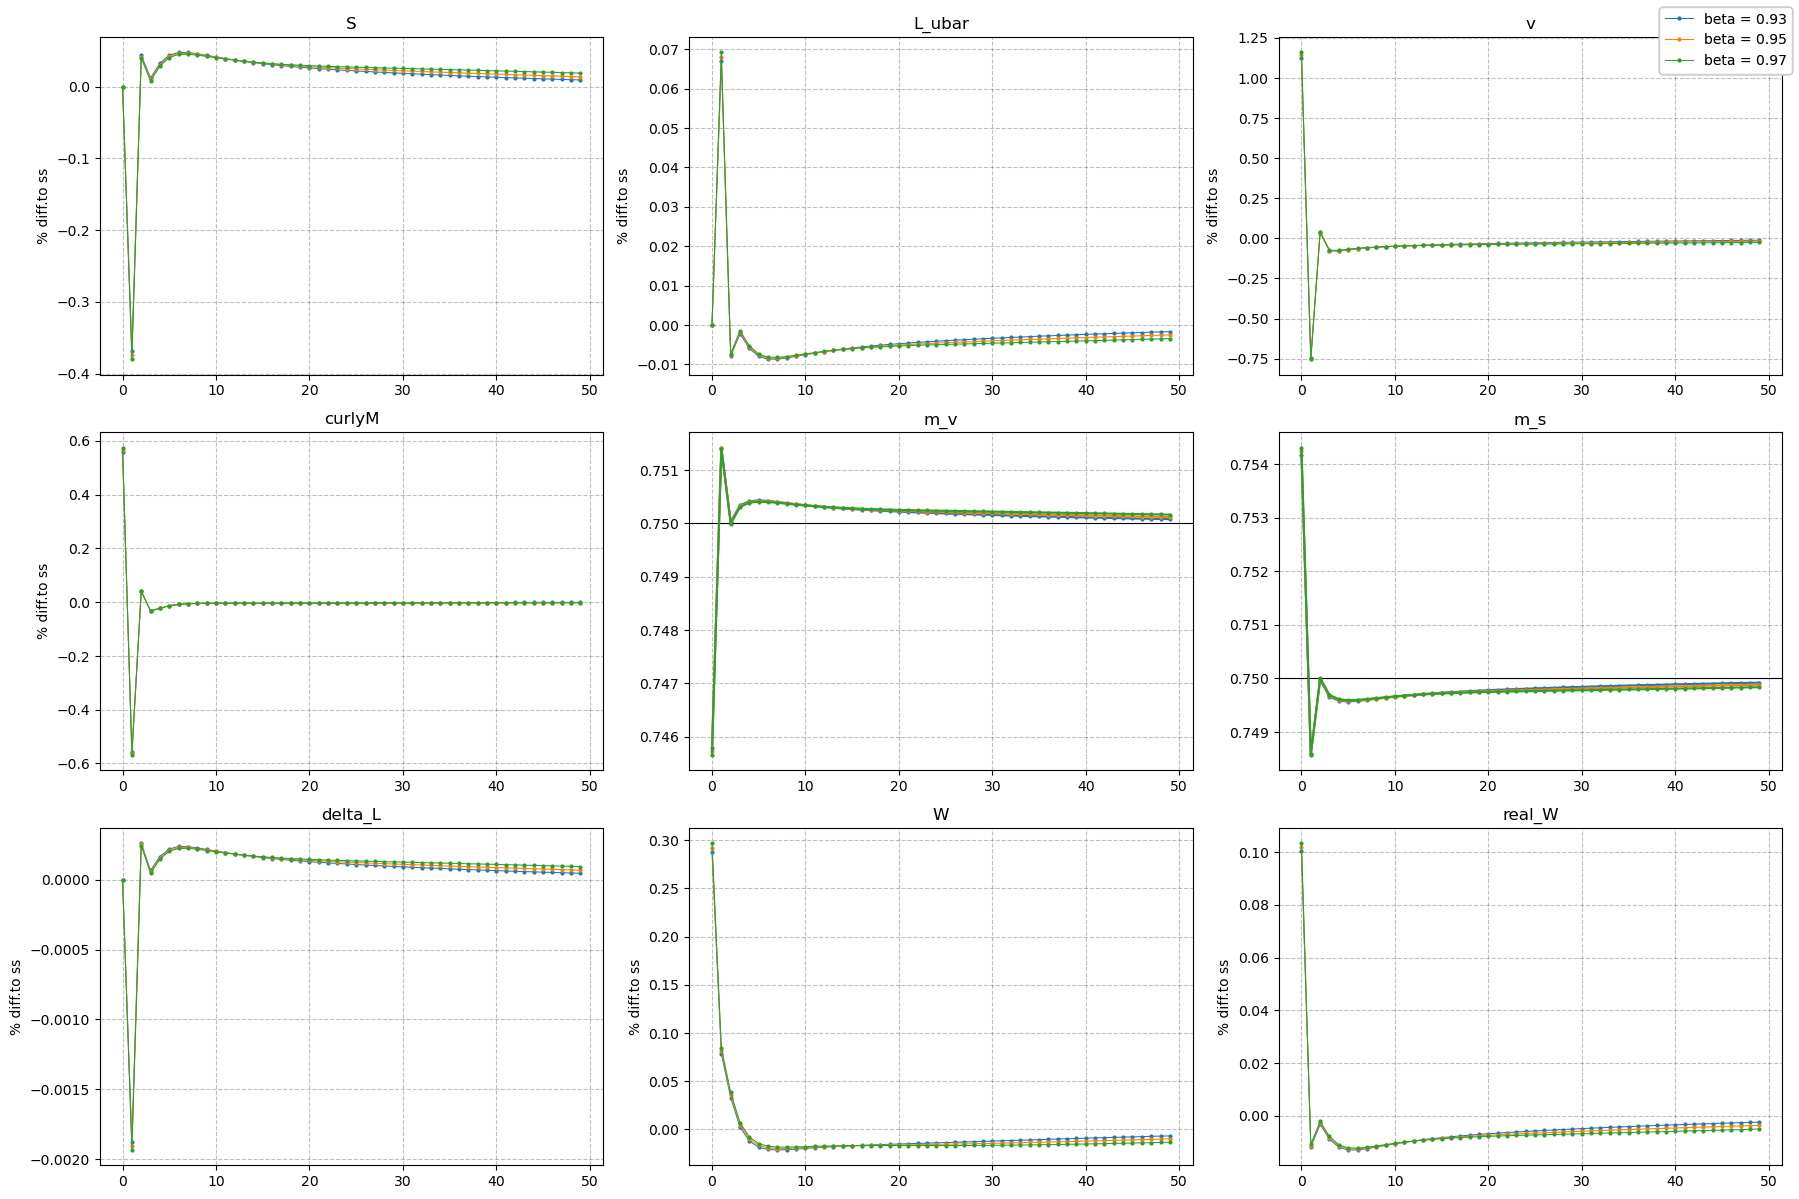

In [11]:
model.plot_IRF_models(models,parameter,varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

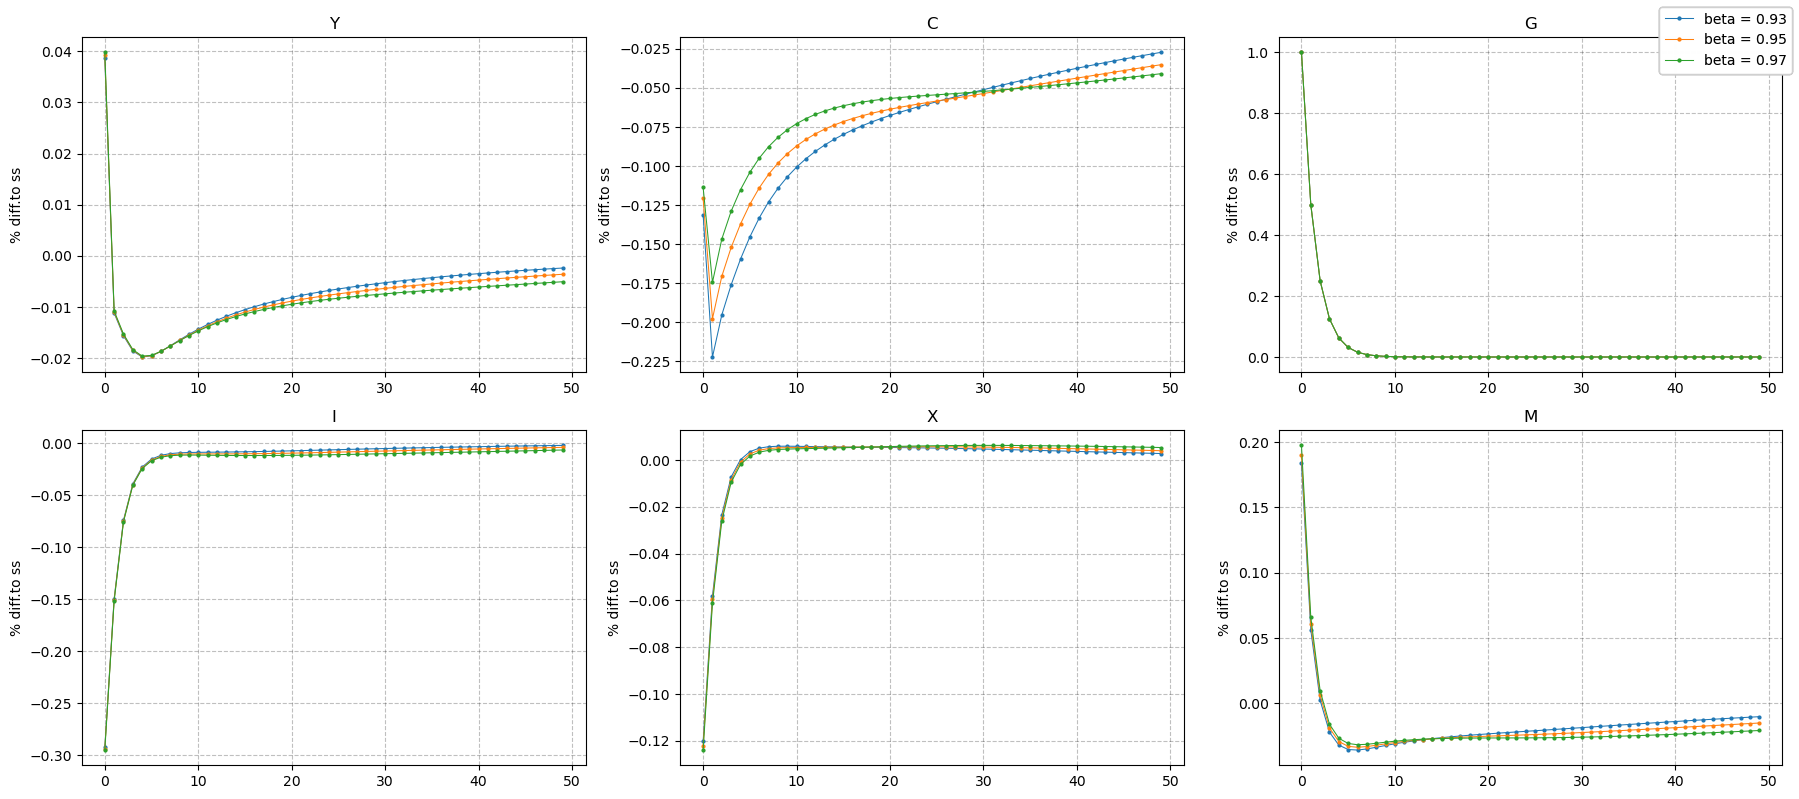

In [12]:
model.plot_IRF_models(models,parameter,varlist=['Y','C','G','I','X','M'])